In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score,r2_score,classification_report

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
churn=pd.read_csv(r'C:\Personal\AI\Ensemble\TelcomChurn.csv')

In [3]:
X = churn.drop(columns=['Churn'])
y = churn['Churn']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=1)

3.c Train a model using Random forest and check the
performance of the model on train and test data

In [5]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

1.0
0.7995735607675906
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1041
           1       0.65      0.49      0.56       366

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



0.7006779420796523

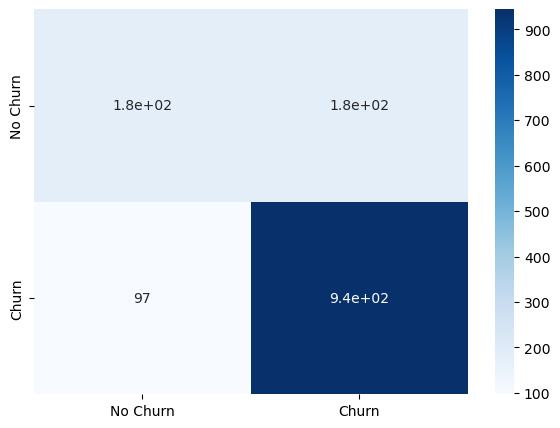

In [6]:
class_train_predict = rf.predict(X_train)
class_test_predict = rf.predict(X_test)
cm=confusion_matrix(y_test, class_test_predict,labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["No Churn","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.show()

3.d Use grid search and improve the performance of the
Random tree model , check the performance of the model on
train and test data , provide the differences observed in
performance in Q3.c and Q3.d

In [7]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto'],
    'max_depth' : [3,4,5,6],
    'criterion' :['gini', 'entropy']
}

gsrf = GridSearchCV(rf,param_grid,cv=10)
gsrf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6], 'max_features': ['auto'],
                         'n_estimators': [200, 500]})

In [8]:
print(gsrf.score(X_train, y_train))
print(gsrf.score(X_test, y_test))

y_pred =gsrf.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

0.816
0.7995735607675906
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1041
           1       0.67      0.45      0.54       366

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407



0.6873907497519725

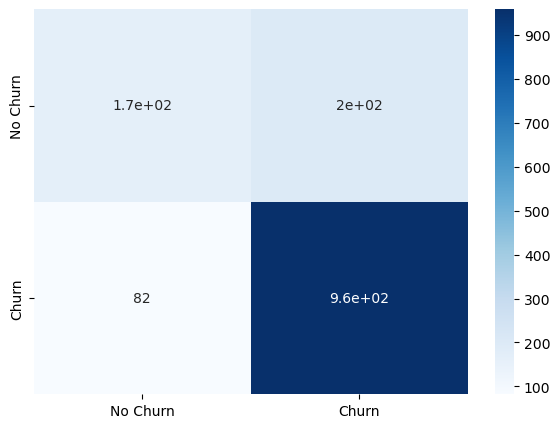

In [9]:
class_train_predict = gsrf.predict(X_train)
class_test_predict = gsrf.predict(X_test)
cm=confusion_matrix(y_test, class_test_predict,labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["No Churn","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.show()

In [10]:
gsrf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 500}

In [11]:
param_grid = { 
    'n_estimators': [500,600],
    'max_features': ['auto'],
    'max_depth' : [6,7,8],
    'criterion' :['gini']
}

gsrf = GridSearchCV(rf,param_grid,cv=10)
gsrf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [6, 7, 8],
                         'max_features': ['auto'], 'n_estimators': [500, 600]})

In [12]:
print(gsrf.score(X_train, y_train))
print(gsrf.score(X_test, y_test))

y_pred =gsrf.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

0.8392888888888889
0.7995735607675906
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1041
           1       0.65      0.49      0.56       366

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



0.6989063164359616

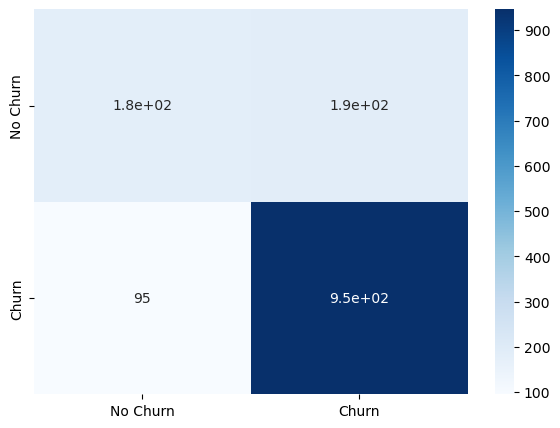

In [13]:
class_train_predict = gsrf.predict(X_train)
class_test_predict = gsrf.predict(X_test)
cm=confusion_matrix(y_test, class_test_predict,labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["No Churn","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.show()

In [14]:
gsrf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

3.e Train a model using Adaboost and check the
performance of the model on train and test data

In [15]:
adaB = AdaBoostClassifier()
adaB.fit(X_train,y_train)

print(adaB.score(X_train, y_train))
print(adaB.score(X_test, y_test))

y_pred = adaB.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

0.8065777777777777
0.8024164889836531
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.65      0.52      0.58       366

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



0.7096856742413505

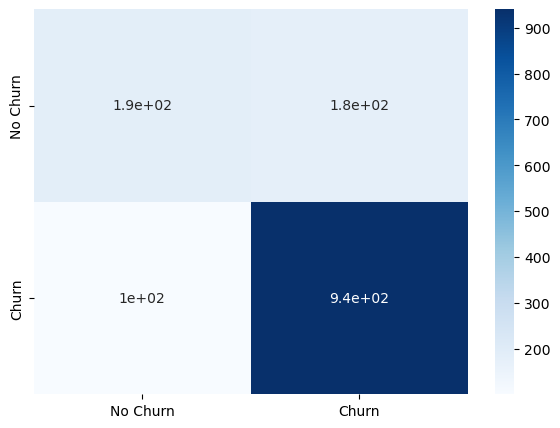

In [16]:
class_train_predict = adaB.predict(X_train)
class_test_predict = adaB.predict(X_test)
cm=confusion_matrix(y_test, class_test_predict,labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["No Churn","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.show()

3.f Use grid search and improve the performance of the
Adaboost model , check the performance of the model on
train and test data , provide the differences observed in
performance in Q3.e and Q3.f

In [17]:
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [18]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=adaB, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

In [19]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.802902 using {'learning_rate': 0.1, 'n_estimators': 500}
0.732800 (0.000683) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.732800 (0.000683) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.732800 (0.000683) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.732800 (0.000683) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.732800 (0.000683) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.732800 (0.000683) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.732800 (0.000683) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.732800 (0.000683) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.732800 (0.000683) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.732800 (0.000683) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.732800 (0.000683) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.788563 (0.010214) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.732800 (0.000683) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.789215

In [20]:
print(grid_result.score(X_train, y_train))
print(grid_result.score(X_test, y_test))

y_pred = grid_result.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

0.8092444444444444
0.8009950248756219
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.58       366

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



0.7113824979134187

3.g Train a model using GradientBoost and check the
performance of the model on train and test data

In [21]:
gb=GradientBoostingClassifier(n_estimators=50)
gb.fit(X_train,y_train)

print(gb.score(X_train, y_train))
print(gb.score(X_test, y_test))

y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

0.8190222222222222
0.7974413646055437
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1041
           1       0.65      0.49      0.56       366

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



0.6974653942457599

3.h Use grid search and improve the performance of the
GradientBoost model , check the performance of the model
on train and test data , provide the differences observed in
performance in Q3.g and Q3.h

In [22]:
parameters = {'learning_rate': [0.01,0.1,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_GBC = GridSearchCV(estimator=gb, param_grid = parameters, cv = cv, n_jobs=-1)
grid_GBC.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=GradientBoostingClassifier(n_estimators=50), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.02, 0.03],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2]})

In [23]:
print("Best: %f using %s" % (grid_GBC.best_score_, grid_GBC.best_params_))
means = grid_GBC.cv_results_['mean_test_score']
stds = grid_GBC.cv_results_['std_test_score']
params = grid_GBC.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.804442 using {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}
0.787493 (0.009126) with: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}
0.785952 (0.009930) with: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}
0.785360 (0.010606) with: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.2}
0.803554 (0.011773) with: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.9}
0.804442 (0.011617) with: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}
0.804384 (0.012076) with: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.2}
0.801242 (0.011721) with: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.9}
0.801361 (0.012497) with: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}
0.800234 (0.011377) with: {'learning_rate': 0.01, 'max_dep

In [24]:
parameters = {'learning_rate': [0.01],
                  'subsample'    : [0.9],
                  'n_estimators' : [500],
                  'max_depth'    : [4]
                 }
grid_gb = GridSearchCV(estimator=gb, param_grid = parameters, cv = cv, n_jobs=-1)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=GradientBoostingClassifier(n_estimators=50), n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [4],
                         'n_estimators': [500], 'subsample': [0.9]})

In [25]:
print(grid_gb.score(X_train, y_train))
print(grid_gb.score(X_test, y_test))

y_pred = grid_gb.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

0.832
0.8009950248756219
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.65      0.51      0.57       366

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



0.7060676209823467

3.i Provide detailed analysis of the below steps
i Compare the performance of each model in train
stage and test stage
II ) Provide your observation on which model performed
the best
III )Provide your reasoning on why the model performed
best
iv )Provide your final conclusion on your observation


We have cleaned the data set and converted the  categorical variable to numerical data and dropped some rows which had the TotalCharges, because there are MonthlyCharges values available which contradicts, and tenure is 0 for all the empty Total charges.

we used multiple model like 

1.Decision tree and improve it by Grid Search after tuning the parameters
Before tuning 
Train data=0.99
Test Data=0.71
After Tuning
Train data=0.79
Test Data=0.79
We see the data in Testing and training are same which says there is no overfitting of data, but still not the best Model

2.Random forest 

Train data=1.0
Test Data=0.79
After Tuning
Train data=0.81
Test Data=0.79
We see the data in Testing and training are same which says there is no overfitting of data, but still not the best Model

3.Adaboost

Train data=0.80
Test Data=0.80

The test data and train have no differece with 80% of accuracy 
After Tuning
Train data=0.80
Test Data=0.70

Best: 0.802902 using {'learning_rate': 0.1, 'n_estimators': 500}

we can see that a configuration with 500 trees and a learning rate of 0.1 performed the best with a classification accuracy of about 80% percent

4.GradientBoost 

Train data=0.80
Test Data=0.80

The test data and train have no differece with 80% of accuracy 
After Tuning
Train data=0.81
Test Data=0.79

Best: 0.804442 using {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}

we can see that a configuration with 500 trees and a learning rate of 0.01 performed the best with a classification accuracy of about 80% percent with Max depth of 4

ii.
After all model execution Ada Boosting works best with the Telecom churn data set. 

iii
Adaboost increases the accuracy of the weak machine learning models and improves model accuracy by going in sequence order.





